# Final Notebook

## Table of Contents
* [***Introduction***](#Introduction)
* [***Package Importing***](#Package-Importing)
* [***Data Importing***](#Data-Importing)   (links to the data sources below.)
     * [Box Office Mojo](https://www.boxofficemojo.com/)
     * [IMDB](https://www.imdb.com/)
     * [Rotten Tomatoes](https://www.rottentomatoes.com/)
     * [TheMovieDB](https://www.themoviedb.org/)
     * [The Numbers](https://www.the-numbers.com/)
* [***Data Cleaning***](#Data-Cleaning)
    * [***Budget vs. Revenue Data Cleaning***](#Budget-vs.-Revenue-Data-Cleaning)
* [***Budget and Revenue Statistical Analysis***](#Budget-and-Revenue-Statistical-Analysis)
* [***Conclusion***](#Conclusion)


## Introduction

This cell will be used to give a little intro.

#### Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import sqlite3 

## Data Importing
* import all of the available data for project

In [2]:
conn = sqlite3.connect('zippedData/im.db')
imdb_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
imdb_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies = tmdb_movies.drop('Unnamed: 0', axis = 1)                     #remove unneccesary column
tn_movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
rt_movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
rt_movies_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding='latin')

## Data Cleaning

### Budget vs. Revenue Data Cleaning

In the following cell, we add new columns named "production_budgetINT", "domestic_grossINT", and "worldwide_grossINT" to the *The Numbers* dataset. These are the columns "production_budget", "domestic_gross", and "worldwide_gross" converted from strings into integers.  We then divide all of those columns by a million and remove all movies with a worldwide gross of 0.

In [3]:
movies_budget = tn_movies_budget 

# creates a production column int column
production_budget = [] 

for budget in movies_budget['production_budget']:
    budget = int(budget[1:].replace(",", ""))
    production_budget.append(budget)
    
movies_budget['production_budgetINT'] = production_budget

# creates a domestic gross int column
domestic_gross = [] 

for gross in movies_budget['domestic_gross']:
    gross = int(gross[1:].replace(",", ""))
    domestic_gross.append(gross)
    
movies_budget['domestic_grossINT'] = domestic_gross

# creates a worldwide gross int column
worldwide_gross = [] 

for gross in movies_budget['worldwide_gross']:
    gross = int(gross[1:].replace(",", ""))
    worldwide_gross.append(gross)
    
movies_budget['worldwide_grossINT'] = worldwide_gross

#removes worldwide budgets of 0
movies_budget = movies_budget[movies_budget.worldwide_grossINT > 0]



#divide each budget by one million
movies_budget[['production_budgetINT', 'worldwide_grossINT', 'domestic_grossINT']] = movies_budget[['production_budgetINT', 'worldwide_grossINT', 'domestic_grossINT']].mul(1/1000000)

### Top Studios' Budgets Data Cleaning

In the cell below, we inner join the *The Numbers* budget dataframe and the *Box Office Mojo* movie gross dataframe on the movie titles. We name this new dataframe "movie_studio_budget." We then drop the one null value and combine the duplicate Warner Brothers studio observations.

In [4]:
movie_gross = bom_movie_gross

#inner join two datasets
movie_studio_budget = movies_budget.merge(movie_gross, how = 'inner', left_on = 'movie', right_on = 'title')
movie_studio_budget = movie_studio_budget[['release_date', 'movie', 'studio','production_budgetINT','worldwide_grossINT']]
#make release date datetime
movie_studio_budget['release_date'] = pd.to_datetime(movie_studio_budget['release_date'])
#drop one null studio row
movie_studio_budget = movie_studio_budget.dropna()
#make new variable called studio to edit studio names
studios = movie_studio_budget['studio']

#rename studios that are the same with different names in the dataset
studios[studios.str.contains('WB')] = 'WB'


# merge the studio variable back into dataframe
movie_studio_budget['studio'] = studios

## Budget and Revenue Statistical Analysis

Below we plot a scatter of Budget 

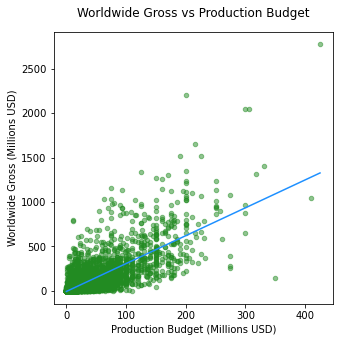

In [5]:
#plot scatterplot of budget and revenue to show relationship between the two
fig = plt.subplots(figsize=(5, 5))
x = movies_budget['production_budgetINT']
 
y = movies_budget['worldwide_grossINT']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title('Worldwide Gross vs Production Budget', pad = 15)

plt.xlabel('Production Budget (Millions USD)')
plt.ylabel('Worldwide Gross (Millions USD)')

plt.scatter(x, y, c ="forestgreen", alpha = .5, s = 20)
plt.plot(x, p(x), color = "dodgerblue")

## Conclusion

This cell will be used to give a little conclusion.